### Autistic Spectrum Disorder Screening using Deep Embedding Representation

The early diagnosis of neurodevelopment disorders can improve treatment and significantly decrease the associated 
healthcare costs. In this project, we will use supervised learning to diagnose Autistic Spectrum Disorder 
(ASD) based on behavioural features and individual characteristics. More specifically, we will build and deploy a neural network using the Keras API, and we use deep embedding representation for categoricaal data.

This project will use a dataset provided by the UCI Machine Learning Repository that contains screening data for 704 patients. The dataset can be found at the following URL: 
https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++

First, we will import a few of libraries we will use in this project. 

In [2]:
%matplotlib inline
import sys
import pandas as pd
import sklearn
import keras

print 'Python: {}'.format(sys.version)
print 'Pandas: {}'.format(pd.__version__)
print 'Sklearn: {}'.format(sklearn.__version__)
print 'Keras: {}'.format(keras.__version__)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Python: 2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 11:07:58) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 0.22.0
Sklearn: 0.19.1
Keras: 2.2.4


In [79]:
# build a neural network using Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### 1. Importing the Dataset

We obtained the data from the UCI Machine Learning Repository; however, since the data isn't contained in a csv or txt file, we had to download the compressed zip file and then extract the data manually (alternatively, you can conver the .arff file to .csv file from https://pulipulichen.github.io/jieba-js/weka/arff2csv/). Once that is accomplished, we read the information in from a csv file using Pandas. 

In [3]:
# import the dataset
file = 'autism_data.csv'

# read the csv
data = pd.read_csv(file)

In [4]:
# print the shape of the DataFrame, so we can see how many examples we have
print 'Shape of DataFrame: {}'.format(data.shape)
print data.loc[0]
data.head(10)

Shape of DataFrame: (704, 22)
id                              1
A1_Score                        1
A2_Score                        1
A3_Score                        1
A4_Score                        1
A5_Score                        0
A6_Score                        0
A7_Score                        1
A8_Score                        1
A9_Score                        0
A10_Score                       0
age                            26
gender                          f
ethnicity          White-European
jundice                        no
austim                         no
contry_of_res       United States
used_app_before                no
result                          6
age_desc              18 and more
relation                     Self
Class/ASD                      NO
Name: 0, dtype: object


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
5,6,1,1,1,1,1,0,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
6,7,0,1,0,0,0,0,0,1,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
7,8,1,1,1,1,0,0,0,0,1,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
8,9,1,1,0,0,1,0,0,1,1,...,m,White-European,no,no,United States,no,6,18 and more,Self,NO
9,10,1,1,1,1,0,1,1,1,1,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES


In [5]:
### handling the missing data for the age variable
# remove sampels with age is '?' 
data = data[data.age != '?']
data.shape # removed two samples

(702, 22)

NO     513
YES    189
Name: Class/ASD, dtype: int64


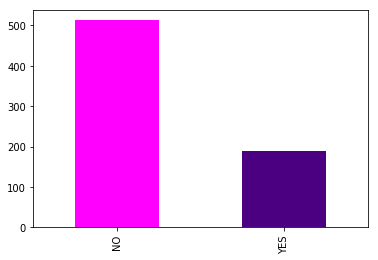

In [6]:
# print out the label distribution
class_ASD = data['Class/ASD']
data['Class/ASD'].value_counts().plot(kind='bar', color=['magenta', 'indigo'])
print(data['Class/ASD'].value_counts())

In [7]:
# print out a description of the dataframe
data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,353.283476,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,4.883191
std,203.128100,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,2.498051
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,353.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,528.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [207]:
data['age'].describe()
print(len(relation_range))

6


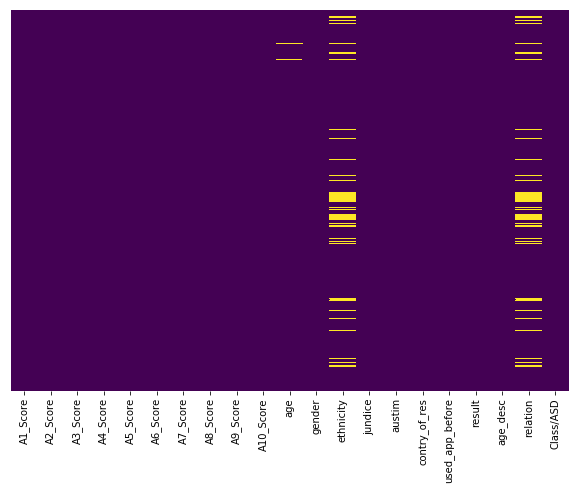

In [200]:
import seaborn as sns
da = pd.read_csv('AutismAdultData.arff',na_values="?") # AutismAdultData.arff is the file before transferring to csv
plt.figure(figsize=(10,7))
sns.heatmap(da.isnull(),cmap="viridis",cbar=False,yticklabels=False)

### 2. Data Preprocessing

This dataset is going to require multiple preprocessing steps. First, we have columns in our DataFrame (attributes) that we don't want to use when training our neural network. We will drop these columns first. Secondly, much of our data is reported using strings; as a result, we will convert our data to categorical labels. During our preprocessing, we will also split the dataset into X and Y datasets, where X has all of the attributes we want to use for prediction and Y has the class labels. 

In [8]:
# drop unwanted columns
data = data.drop(['result', 'age_desc'], axis=1)

In [9]:
data.loc[:10]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,?,NO
5,6,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,Self,YES
6,7,0,1,0,0,0,0,0,1,0,0,17,f,Black,no,no,United States,no,Self,NO
7,8,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,New Zealand,no,Parent,NO
8,9,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,United States,no,Self,NO
9,10,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,Health care professional,YES


In [10]:
# create X and Y datasets for training
y = data['Class/ASD']
x = data.drop(['Class/ASD'], 1)
#x = x.drop(['id'], 1)

Text(0,0.5,u'Frequency')

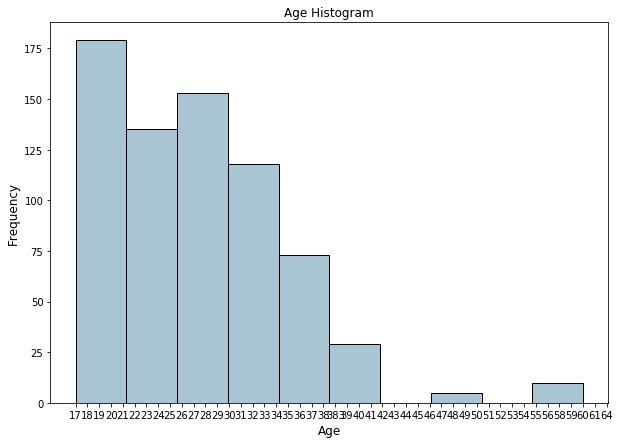

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
x['age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [38]:
import scipy.stats as spstats
age = np.array(x['age'].astype(str).astype(int))
l, opt_lambda = spstats.boxcox(age)
print('Optimal lambda value:', opt_lambda)

('Optimal lambda value:', -0.8831633675267976)


In [54]:
x['age_boxcox_lambda_opt'] = spstats.boxcox(x['age'].astype(str).astype(int), lmbda=opt_lambda)

Text(0,0.5,u'Frequency')

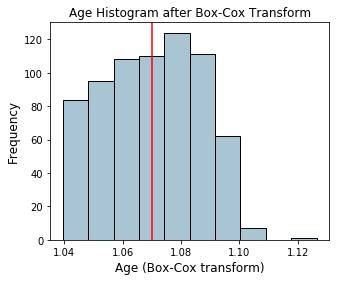

In [61]:
age_boxcox_mean = np.round(
                      np.mean(
                       x['age_boxcox_lambda_opt']),2)
fig, ax = plt.subplots(figsize=(5,4))
x['age_boxcox_lambda_opt'].hist(color='#A9C5D3', edgecolor='black', grid=False)
plt.axvline(age_boxcox_mean, color='r')
ax.set_title('Age Histogram after Box-Cox Transform', fontsize=12)
ax.set_xlabel('Age (Box-Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
# ax.text(24, 45, r'$\mu$='+str(age_boxcox_mean), fontsize=10)

In [70]:
# print all possible values for categorical features
gender_range = list(set(x['gender'].values))
ethnicity_range = list(set(x['ethnicity'].values))
jundice_range = list(set(x['jundice'].values))
austim_range = list(set(x['austim'].values))
contry_of_res_range = list(set(x['contry_of_res'].values))
used_app_before_range = list(set(x['used_app_before'].values))
relation_range = list(set(x['relation'].values))
class_range = list(set(y.values))
for i in range(len(gender_range)):
    x.loc[x['gender'] == gender_range[i], 'gender'] = i
for i in range(len(ethnicity_range)):
    x.loc[x['ethnicity'] == ethnicity_range[i], 'ethnicity'] = i
for i in range(len(jundice_range)):
    x.loc[x['jundice'] == jundice_range[i], 'jundice'] = i
for i in range(len(austim_range)):
    x.loc[x['austim'] == austim_range[i], 'austim'] = i
for i in range(len(contry_of_res_range)):
    x.loc[x['contry_of_res'] == contry_of_res_range[i], 'contry_of_res'] = i
for i in range(len(used_app_before_range)):
    x.loc[x['used_app_before'] == used_app_before_range[i], 'used_app_before'] = i
for i in range(len(relation_range)):
    x.loc[x['relation'] == relation_range[i], 'relation'] = i   
x.head(10)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,age_boxcox_lambda_opt
0,1,1,1,1,1,0,0,1,1,0,0,26,1,2,1,1,40,1,2,1.068569
1,2,1,1,0,1,0,0,0,1,0,1,24,0,9,1,0,0,1,2,1.063901
2,3,1,1,0,1,1,0,1,1,1,1,27,0,9,0,0,31,1,1,1.070658
3,4,1,1,0,1,0,0,1,1,0,1,35,1,2,1,0,40,1,2,1.083282
4,5,1,0,0,0,0,0,0,1,0,0,40,1,11,1,1,53,1,5,1.088734
5,6,1,1,1,1,1,0,1,1,1,1,36,0,7,0,1,40,1,2,1.084487
6,7,0,1,0,0,0,0,0,1,0,0,17,1,5,1,1,40,1,2,1.039552
7,8,1,1,1,1,0,0,0,0,1,0,64,0,2,1,1,44,1,1,1.103532
8,9,1,1,0,0,1,0,0,1,1,1,29,0,2,1,1,40,1,2,1.074427
9,10,1,1,1,1,0,1,1,1,1,0,17,0,6,0,0,9,1,0,1.039552


In [71]:
print(class_range)
y.replace(['YES', 'NO'], [1, 0], inplace=True)
y.head(10)

['YES', 'NO']


0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Class/ASD, dtype: int64

In [72]:
x.shape

(702, 20)

In [73]:
x = x.drop(['age_boxcox_lambda_opt'], axis=1)

### 3. Split the Dataset into Training and Testing Datasets

Before we can begin training our neural network, we need to split the dataset into training and testing datasets. This will allow us to test our network after we are done training to determine how well it will generalize to new data. This step is incredibly easy when using the train_test_split() function provided by scikit-learn!

In [139]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [140]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, Y, test_size = 0.2)

In [141]:
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(561, 19)
(141, 19)
(561, 2)
(141, 2)


### 4. Building the Network - Keras

In this project, we are going to use Keras to build and train our network. This model will be relatively simple and will only use dense (also known as fully connected) layers. This is the most common neural network layer. The network will have one hidden layer, use an Adam optimizer, and a categorical crossentropy loss. We won't worry about optimizing parameters such as learning rate, number of neurons in each layer, or activation functions in this project; however, if you have the time, manually adjusting these parameters and observing the results is a great way to learn about their function!

In [142]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import h5py
import copy
from keras.models import Model as KerasModel

# def __init__(self, X_train, y_train, X_val, y_val):
#         super().__init__()
#         self.epochs = 10
#         self.checkpointer = ModelCheckpoint(filepath="best_model_weights.hdf5", verbose=1, save_best_only=True)
#         self.max_log_y = max(numpy.max(numpy.log(y_train)), numpy.max(numpy.log(y_val)))
#         self.__build_keras_model()
#         self.fit(X_train, y_train, X_val, y_val)
def split_features(X):
    X_list = []
    A1_Score = X[..., [1]]
    X_list.append(A1_Score)

    A2_Score = X[..., [2]]
    X_list.append(A2_Score)

    A3_Score = X[..., [3]]
    X_list.append(A3_Score)

    A4_Score = X[..., [4]]
    X_list.append(A4_Score)

    A5_Score = X[..., [5]]
    X_list.append(A5_Score)

    A6_Score = X[..., [6]]
    X_list.append(A6_Score)

    A7_Score = X[..., [7]]
    X_list.append(A7_Score)
    
    A8_Score = X[..., [8]]
    X_list.append(A8_Score)

    A9_Score = X[..., [9]]
    X_list.append(A9_Score)

    A10_Score = X[..., [10]]
    X_list.append(A10_Score)

    age = X[..., [11]]
    X_list.append(age)

    gender = X[..., [12]]
    X_list.append(gender)

    ethnicity = X[..., [13]]
    X_list.append(ethnicity)
    
    jundice = X[..., [14]]
    X_list.append(jundice)

    austim = X[..., [15]]
    X_list.append(austim)

    contry_of_res = X[..., [16]]
    X_list.append(contry_of_res)

    used_app_before = X[..., [17]]
    X_list.append(used_app_before)
    
    relation = X[..., [18]]
    X_list.append(relation)

    return X_list

def preprocessing(X):
    X_list = split_features(X)
    return X_list

def __build_keras_model():
    input_A1_Score = Input(shape=(1,))
    output_A1_Score = Embedding(2, 2, name='A1_Score_embedding')(input_A1_Score)
    output_A1_Score = Reshape(target_shape=(2,))(output_A1_Score)

    input_A2_Score = Input(shape=(1,))
    output_A2_Score = Embedding(2, 2, name='A2_Score_embedding')(input_A2_Score)
    output_A2_Score = Reshape(target_shape=(2,))(output_A2_Score)
    
    input_A3_Score = Input(shape=(1,))
    output_A3_Score = Embedding(2, 2, name='A3_Score_embedding')(input_A3_Score)
    output_A3_Score = Reshape(target_shape=(2,))(output_A3_Score)
    
    input_A4_Score = Input(shape=(1,))
    output_A4_Score = Embedding(2, 2, name='A4_Score_embedding')(input_A4_Score)
    output_A4_Score = Reshape(target_shape=(2,))(output_A4_Score)
    
    input_A5_Score = Input(shape=(1,))
    output_A5_Score = Embedding(2, 2, name='A5_Score_embedding')(input_A5_Score)
    output_A5_Score = Reshape(target_shape=(2,))(output_A5_Score)
    
    input_A6_Score = Input(shape=(1,))
    output_A6_Score = Embedding(2, 2, name='A6_Score_embedding')(input_A6_Score)
    output_A6_Score = Reshape(target_shape=(2,))(output_A6_Score)
    
    input_A7_Score = Input(shape=(1,))
    output_A7_Score = Embedding(2, 2, name='A7_Score_embedding')(input_A7_Score)
    output_A7_Score = Reshape(target_shape=(2,))(output_A7_Score)
    
    input_A8_Score = Input(shape=(1,))
    output_A8_Score = Embedding(2, 2, name='A8_Score_embedding')(input_A8_Score)
    output_A8_Score = Reshape(target_shape=(2,))(output_A8_Score)
    
    input_A9_Score = Input(shape=(1,))
    output_A9_Score = Embedding(2, 2, name='A9_Score_embedding')(input_A9_Score)
    output_A9_Score = Reshape(target_shape=(2,))(output_A9_Score)
    
    input_A10_Score = Input(shape=(1,))
    output_A10_Score = Embedding(2, 2, name='A10_Score_embedding')(input_A10_Score)
    output_A10_Score = Reshape(target_shape=(2,))(output_A10_Score)

    input_age = Input(shape=(1,))
    output_age = Dense(1)(input_age)

    input_gender = Input(shape=(1,))
    output_gender = Embedding(2, 2, name='gender_embedding')(input_gender)
    output_gender = Reshape(target_shape=(2,))(output_gender)
    
    input_ethnicity = Input(shape=(1,))
    output_ethnicity = Embedding(len(ethnicity_range), 5, name='ethnicity_embedding')(input_ethnicity)
    output_ethnicity = Reshape(target_shape=(5,))(output_ethnicity)

    input_jundice = Input(shape=(1,))
    output_jundice = Embedding(len(jundice_range), 2, name='jundice_embedding')(input_jundice)
    output_jundice = Reshape(target_shape=(2,))(output_jundice)

    input_austim = Input(shape=(1,))
    output_austim = Embedding(len(austim_range), 2, name='austim_embedding')(input_austim)
    output_austim = Reshape(target_shape=(2,))(output_austim)

    input_contry_of_res = Input(shape=(1,))
    output_contry_of_res = Embedding(len(contry_of_res_range), 10, name='contry_of_res_embedding')(input_contry_of_res)
    output_contry_of_res = Reshape(target_shape=(10,))(output_contry_of_res)
    
    input_used_app_before = Input(shape=(1,))
    output_used_app_before = Embedding(len(used_app_before_range), 2, name='used_app_before_embedding')(input_used_app_before)
    output_used_app_before = Reshape(target_shape=(2,))(output_used_app_before)
    
    input_relation = Input(shape=(1,))
    output_relation = Embedding(len(relation_range), 2, name='relation_embedding')(input_relation)
    output_relation = Reshape(target_shape=(2,))(output_relation)

    input_model = [input_A1_Score, input_A2_Score, input_A3_Score, input_A4_Score, input_A5_Score, input_A6_Score, 
                   input_A7_Score, input_A8_Score, input_A9_Score, input_A10_Score, input_age, input_gender, 
                   input_ethnicity, input_jundice, input_austim, input_contry_of_res, input_used_app_before,
                   input_relation]

    output_embeddings = [output_A1_Score, output_A2_Score, output_A3_Score, output_A4_Score, output_A5_Score, 
                         output_A6_Score, output_A7_Score, output_A8_Score, output_A9_Score, output_A10_Score, 
                         output_age, output_gender, output_ethnicity, output_jundice, output_austim, 
                         output_contry_of_res, output_used_app_before, output_relation]

    output_model = Concatenate()(output_embeddings)
    output_model = Dense(1000, kernel_initializer="uniform")(output_model)
    output_model = Activation('relu')(output_model)
    output_model = Dense(500, kernel_initializer="uniform")(output_model)
    output_model = Activation('relu')(output_model)
    output_model = Dense(2)(output_model)
    output_model = Activation('sigmoid')(output_model)

    model = KerasModel(inputs=input_model, outputs=output_model)
    #self.model.compile(loss='mean_absolute_error', optimizer='adam')
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = __build_keras_model()

print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_145 (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
input_146 (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
input_147 (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
input_148 (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
input_149 

### 5. Training the Network

Now it's time for the fun! Training a Keras model is as simple as calling model.fit().

In [143]:
# fit the model to the training data
history = model.fit(preprocessing(X_train.values), Y_train.values, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
561/561 [==============================] - 2s 4ms/step - loss: 0.6188 - acc: 0.7059
Epoch 2/50
561/561 [==============================] - 1s 908us/step - loss: 0.4036 - acc: 0.7255
Epoch 3/50
561/561 [==============================] - 1s 908us/step - loss: 0.1759 - acc: 0.9358
Epoch 4/50
561/561 [==============================] - 1s 922us/step - loss: 0.1353 - acc: 0.9608
Epoch 5/50
561/561 [==============================] - 1s 909us/step - loss: 0.0334 - acc: 0.9893
Epoch 6/50
561/561 [==============================] - 1s 916us/step - loss: 0.0154 - acc: 0.9982
Epoch 7/50
561/561 [==============================] - 1s 909us/step - loss: 0.0075 - acc: 1.0000
Epoch 8/50
561/561 [==============================] - 1s 911us/step - loss: 0.0043 - acc: 1.0000
Epoch 9/50
561/561 [==============================] - 1s 917us/step - loss: 0.0028 - acc: 1.0000
Epoch 10/50
561/561 [==============================] - 1s 909us/step - loss: 0.0020 - acc: 1.0000
Epoch 11/50
561/561 [==========

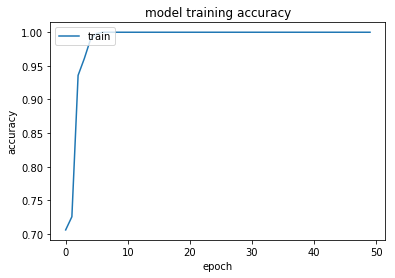

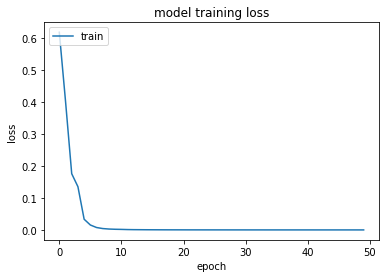

In [144]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6. Testing and Performance Metrics

Now that our model has been trained, we need to test its performance on the testing dataset. The model has never seen this information before; as a result, the testing dataset allows us to determine whether or not the model will be able to generalize to information that wasn't used during its training phase. We will use some of the metrics provided by scikit-learn for this purpose! 

In [145]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(X_test.shape)
predictions = model.predict(preprocessing(X_test.values))
predicted_classes = np.argmax(predictions, axis=1)
con_matrix = confusion_matrix(Y_test[1], predicted_classes)

(141, 19)


In [146]:
print('Results for Categorical Model')
print('prediction accuracy: ' + str(accuracy_score(Y_test[[1]], predicted_classes)*100) + '%')
print(classification_report(Y_test[[1]], predicted_classes))

Results for Categorical Model
prediction accuracy: 99.29078014184397%
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       107
          1       0.97      1.00      0.99        34

avg / total       0.99      0.99      0.99       141



Automatically created module for IPython interactive environment


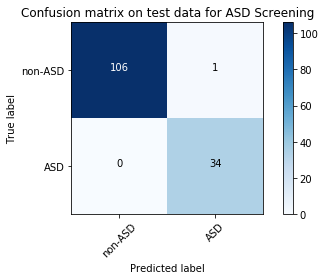

In [147]:
print(__doc__)

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ['non-ASD','ASD']
plt.figure()
plot_confusion_matrix(con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

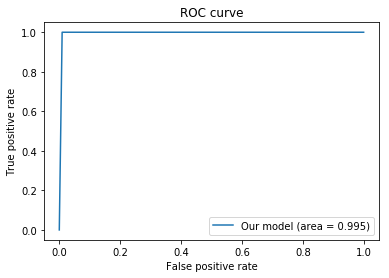

In [150]:
# AUC curve
from sklearn.metrics import roc_curve, auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test[[1]], predicted_classes)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot(fpr_keras, tpr_keras, label='Our model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Baseline1: Using one-hot encoding and shallow classifiers

In [240]:
# convert the data to categorical values - one-hot-encoded vectors
#X_train = X_train.drop(['id'], axis=1)
#X_test = X_test.drop(['id'], axis=1)
X_onehot = pd.get_dummies(x)
X_test_ids = X_test.values[:,0] - 1 # ids in test data
new_X_test_ids = [] # because we deleted two sampels with age = ?
for i in X_test_ids:
    if i > 62 and i < 91:
        i = i - 1
    elif i > 91:
        i = i - 2
    new_X_test_ids.append(i)
print(new_X_test_ids)

[536, 82, 572, 435, 549, 40, 437, 380, 360, 628, 208, 167, 121, 598, 645, 566, 374, 681, 646, 528, 288, 369, 81, 105, 249, 109, 201, 71, 583, 443, 396, 165, 184, 178, 325, 655, 424, 25, 335, 22, 53, 346, 662, 484, 15, 57, 172, 250, 410, 409, 273, 282, 569, 553, 639, 406, 355, 237, 223, 168, 697, 134, 189, 210, 453, 391, 404, 277, 13, 149, 467, 392, 356, 551, 692, 390, 418, 690, 678, 658, 667, 319, 164, 6, 302, 283, 72, 146, 512, 543, 323, 397, 416, 129, 604, 89, 311, 235, 423, 425, 102, 36, 431, 34, 480, 185, 275, 265, 509, 229, 455, 241, 2, 394, 661, 170, 87, 219, 112, 344, 567, 28, 596, 376, 20, 665, 267, 104, 479, 276, 35, 483, 504, 243, 125, 400, 386, 539, 605, 336, 316]


In [262]:
X_test_onehot = X_onehot.iloc[new_X_test_ids]
Y_test_onehot = Y.iloc[new_X_test_ids]
# this is to recover training data
X_train_onehot = X_onehot.drop(X_onehot.index[new_X_test_ids])
Y_train_onehot = Y.drop(Y.index[new_X_test_ids])

In [254]:
# print the new categorical column labels
X_train_onehot.columns.values

array(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'age_17', 'age_18', 'age_19',
       'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25',
       'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31',
       'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37',
       'age_38', 'age_383', 'age_39', 'age_40', 'age_41', 'age_42',
       'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48',
       'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54',
       'age_55', 'age_56', 'age_58', 'age_59', 'age_60', 'age_61',
       'age_64'], dtype=object)

In [255]:
# print an example patient from the categorical data
X_train_onehot.loc[1]

id                 2
A1_Score           1
A2_Score           1
A3_Score           0
A4_Score           1
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           1
A9_Score           0
A10_Score          1
gender             0
ethnicity          9
jundice            1
austim             0
contry_of_res      0
used_app_before    1
relation           2
age_17             0
age_18             0
age_19             0
age_20             0
age_21             0
age_22             0
age_23             0
age_24             1
age_25             0
age_26             0
age_27             0
age_28             0
                  ..
age_33             0
age_34             0
age_35             0
age_36             0
age_37             0
age_38             0
age_383            0
age_39             0
age_40             0
age_41             0
age_42             0
age_43             0
age_44             0
age_45             0
age_46             0
age_47             0
age_48       

In [256]:
Y.iloc[:10]

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,0,1


In [260]:
# define a function to build the keras model
def create_model():
    # create model
    NN_model = Sequential()
    NN_model.add(Dense(8, input_dim=64, kernel_initializer='normal', activation='relu'))
    NN_model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    NN_model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    NN_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return NN_model

NN_model = create_model()

print(NN_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 10        
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________
None


In [263]:
# fit the model to the training data
history = NN_model.fit(X_train_onehot, Y_train_onehot, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
561/561 [==============================] - 0s 364us/step - loss: 0.5385 - acc: 0.7237
Epoch 2/50
561/561 [==============================] - 0s 298us/step - loss: 0.4780 - acc: 0.7237
Epoch 3/50
561/561 [==============================] - 0s 259us/step - loss: 0.4862 - acc: 0.7237
Epoch 4/50
561/561 [==============================] - 0s 265us/step - loss: 0.4751 - acc: 0.7237
Epoch 5/50
561/561 [==============================] - 0s 265us/step - loss: 0.4241 - acc: 0.7237
Epoch 6/50
561/561 [==============================] - 0s 252us/step - loss: 0.4141 - acc: 0.7237
Epoch 7/50
561/561 [==============================] - 0s 250us/step - loss: 0.3980 - acc: 0.7237
Epoch 8/50
561/561 [==============================] - 0s 244us/step - loss: 0.3737 - acc: 0.8057
Epoch 9/50
561/561 [==============================] - 0s 256us/step - loss: 0.3499 - acc: 0.8663
Epoch 10/50
561/561 [==============================] - 0s 241us/step - loss: 0.3400 - acc: 0.8717
Epoch 11/50
561/561 [========

Results for onehot_NN Model
prediction accuracy: 94.32624113475178%
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       107
          1       0.91      0.85      0.88        34

avg / total       0.94      0.94      0.94       141



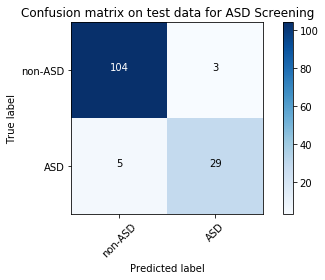

In [424]:
onehot_NN_predictions = NN_model.predict(X_test_onehot.values)
onehot_NN_predicted_classes = np.argmax(onehot_NN_predictions, axis=1)
onehot_NN_con_matrix = confusion_matrix(Y_test_onehot[1], onehot_NN_predicted_classes)
print('Results for onehot_NN Model')
print('prediction accuracy: ' + str(accuracy_score(Y_test_onehot[[1]], onehot_NN_predicted_classes)*100) + '%')
print(classification_report(Y_test_onehot[[1]], onehot_NN_predicted_classes))
plt.figure()
plot_confusion_matrix(onehot_NN_con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

In [296]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train_onehot, Y_train_onehot)
y_pred_rf = rf.predict(X_test_onehot)
onehot_rf_predicted_classes = np.argmax(y_pred_rf, axis=1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test_onehot[[1]], onehot_rf_predicted_classes)
auc_rf = auc(fpr_rf, tpr_rf)

             precision    recall  f1-score   support

          0       0.91      0.98      0.95       107
          1       0.92      0.71      0.80        34

avg / total       0.92      0.91      0.91       141



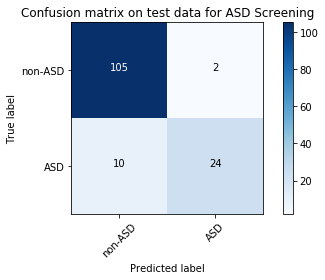

In [419]:
print(classification_report(Y_test_onehot[[1]], onehot_rf_predicted_classes))
rf_con_matrix = confusion_matrix(Y_test_onehot[[1]], onehot_rf_predicted_classes)
plt.figure()
plot_confusion_matrix(rf_con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

0.950354609929078
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       107
          1       0.91      0.88      0.90        34

avg / total       0.95      0.95      0.95       141



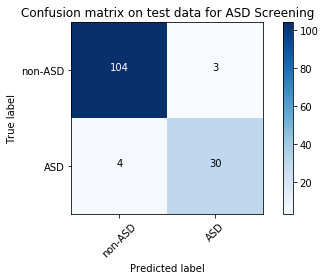

In [420]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(solver='lbfgs').fit(X_train_onehot, Y_train_onehot[[1]])
y_pred_lr = lr.predict(X_test_onehot)
y_pred_pro_lr = lr.predict_proba(X_test_onehot)

print(lr.score(X_test_onehot, Y_test_onehot[[1]]))

fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test_onehot[[1]], y_pred_pro_lr[:,1])
auc_lr = roc_auc_score(Y_test_onehot[[1]], y_pred_pro_lr[:,1])
print(classification_report(Y_test_onehot[[1]], y_pred_lr))
lr_con_matrix = confusion_matrix(Y_test_onehot[[1]], y_pred_lr)
plt.figure()
plot_confusion_matrix(lr_con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

             precision    recall  f1-score   support

          0       0.82      0.83      0.82       107
          1       0.44      0.41      0.42        34

avg / total       0.73      0.73      0.73       141



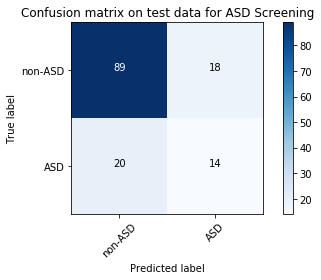

In [421]:
from sklearn import svm
svm_cl = svm.SVC(kernel='rbf', C=100, probability=True)
y_pred_svm = svm_cl.fit(X_train_onehot, Y_train_onehot[[1]]).predict(X_test_onehot)
print(classification_report(Y_test_onehot[[1]], y_pred_svm))

svm_con_matrix = confusion_matrix(Y_test_onehot[[1]], y_pred_svm)
plt.figure()
plot_confusion_matrix(svm_con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

In [377]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', gamma=0.001, C=100,probability=True).fit(X_train_onehot, Y_train_onehot[[1]])

predictedprobSVC = rbf_svc.predict_proba(X_test_onehot)
#GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test_onehot[[1]], predictedprobSVC[:,1])
auc_svm = auc(fpr_svm, tpr_svm)
print(auc_svm)

0.8301264431006048


             precision    recall  f1-score   support

          0       0.89      0.92      0.90       107
          1       0.71      0.65      0.68        34

avg / total       0.85      0.85      0.85       141



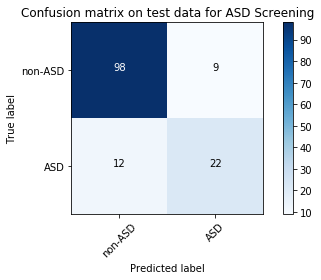

In [422]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=3, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train_onehot, Y_train_onehot[[1]])
#mean_squared_error(y_test, est.predict(X_test)) 
y_pred_gb = clf.predict(X_test_onehot)
print(classification_report(Y_test_onehot[[1]], y_pred_gb))

prob_gb = clf.predict_proba(X_test_onehot)[:,1]  

fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test_onehot[[1]], prob_gb)
auc_gb = auc(fpr_gb, tpr_gb)

gb_con_matrix = confusion_matrix(Y_test_onehot[[1]], y_pred_gb)
plt.figure()
plot_confusion_matrix(gb_con_matrix, classes=class_names,
                      title='Confusion matrix on test data for ASD Screening')



plt.show()

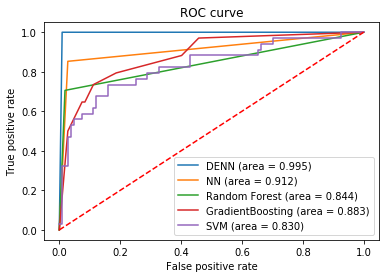

In [418]:
# AUC curve
from sklearn.metrics import roc_curve, auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test[[1]], predicted_classes)
auc_keras = auc(fpr_keras, tpr_keras)
fpr_onehot_NN, tpr_rf_onehot_NN, thresholds_onehot_NN = roc_curve(Y_test_onehot[[1]], onehot_NN_predicted_classes)
auc_onehot_NN = auc(fpr_onehot_NN, tpr_rf_onehot_NN)
plt.plot(fpr_keras, tpr_keras, label='DENN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_onehot_NN, tpr_rf_onehot_NN, label='NN (area = {:.3f})'.format(auc_onehot_NN))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_gb, tpr_gb, label='GradientBoosting (area = {:.3f})'.format(auc_gb))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.3f})'.format(auc_svm))
#plt.plot(fpr_lr, tpr_lr, label='onehot_lr (area = {:.3f})'.format(auc_lr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()